In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

**Step 01 # Import All the Requried Libraries**

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.1/112.6 GB disk)


In [2]:
from ultralytics import YOLO
from IPython.display import Image

In [4]:
from zipfile import ZipFile
import os


zip_path = "/content/dataset.zip"
extract_path = "/content/dataset1"


with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to {extract_path}")

print("Extracted files:")
print(os.listdir(extract_path))


Dataset extracted to /content/dataset1
Extracted files:
['dataset']


**STEP 2: LOAD AND VERIFY DATASET**

In [ ]:
"""
correct format of dataset that will be compatiable with Yolov11
│── images
│   ├── train (contains training images)
│   ├── test (contains test images)
│   ├── val    (contains validation images)
│── labels
│   ├── train  (contains corresponding labels in YOLO format)
│   ├── test    (contains corresponding labels in YOLO format)
│   ├── val    (contains corresponding labels in YOLO format)
│── data.yaml
"""

'\n/content/dataset\n│── images\n│   ├── train  (contains training images)\n│   ├── val    (contains validation images)\n│── labels\n│   ├── train  (contains corresponding labels in YOLO format)\n│   ├── val    (contains corresponding labels in YOLO format)\n│── data.yaml\n'

In [6]:
yaml_content = """train: /content/dataset1/images/train
val: /content/dataset1/images/val
nc: 1
names: ['Pentagon']
"""

with open("/content/dataset1/data.yaml", "w") as f:
    f.write(yaml_content)

print("✅ data.yaml file created successfully!")



✅ data.yaml file created successfully!


In [7]:
import os

dataset_path = "/content/dataset1"

# Check if required folders exist
required_folders = ["images/train", "images/val", "labels/train", "labels/val"]
missing_folders = [folder for folder in required_folders if not os.path.exists(os.path.join(dataset_path, folder))]

if missing_folders:
    print(f"❌ Missing required folders: {missing_folders}")
else:
    print("✅ Required folders exist.")

# Check if images and labels match
train_images = os.listdir(os.path.join(dataset_path, "images/train"))
train_labels = os.listdir(os.path.join(dataset_path, "labels/train"))
val_images = os.listdir(os.path.join(dataset_path, "images/val"))
val_labels = os.listdir(os.path.join(dataset_path, "labels/val"))

print(f"📂 Train Images: {len(train_images)}, Train Labels: {len(train_labels)}")
print(f"📂 Val Images: {len(val_images)}, Val Labels: {len(val_labels)}")

# Check if data.yaml exists
if os.path.exists(os.path.join(dataset_path, "data.yaml")):
    print("✅ data.yaml file found!")
else:
    print("❌ data.yaml file is missing!")



✅ Required folders exist.
📂 Train Images: 1200, Train Labels: 1200
📂 Val Images: 150, Val Labels: 150
✅ data.yaml file found!


**Step # 03 Train YOLO11 Model on a Custom Dataset**

In [8]:
!yolo task=detect mode=train data=/content/dataset1/data.yaml model="yolo11n.pt" epochs=40 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 131MB/s]
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/dataset1/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

**Step # 04 Examine Training Results**

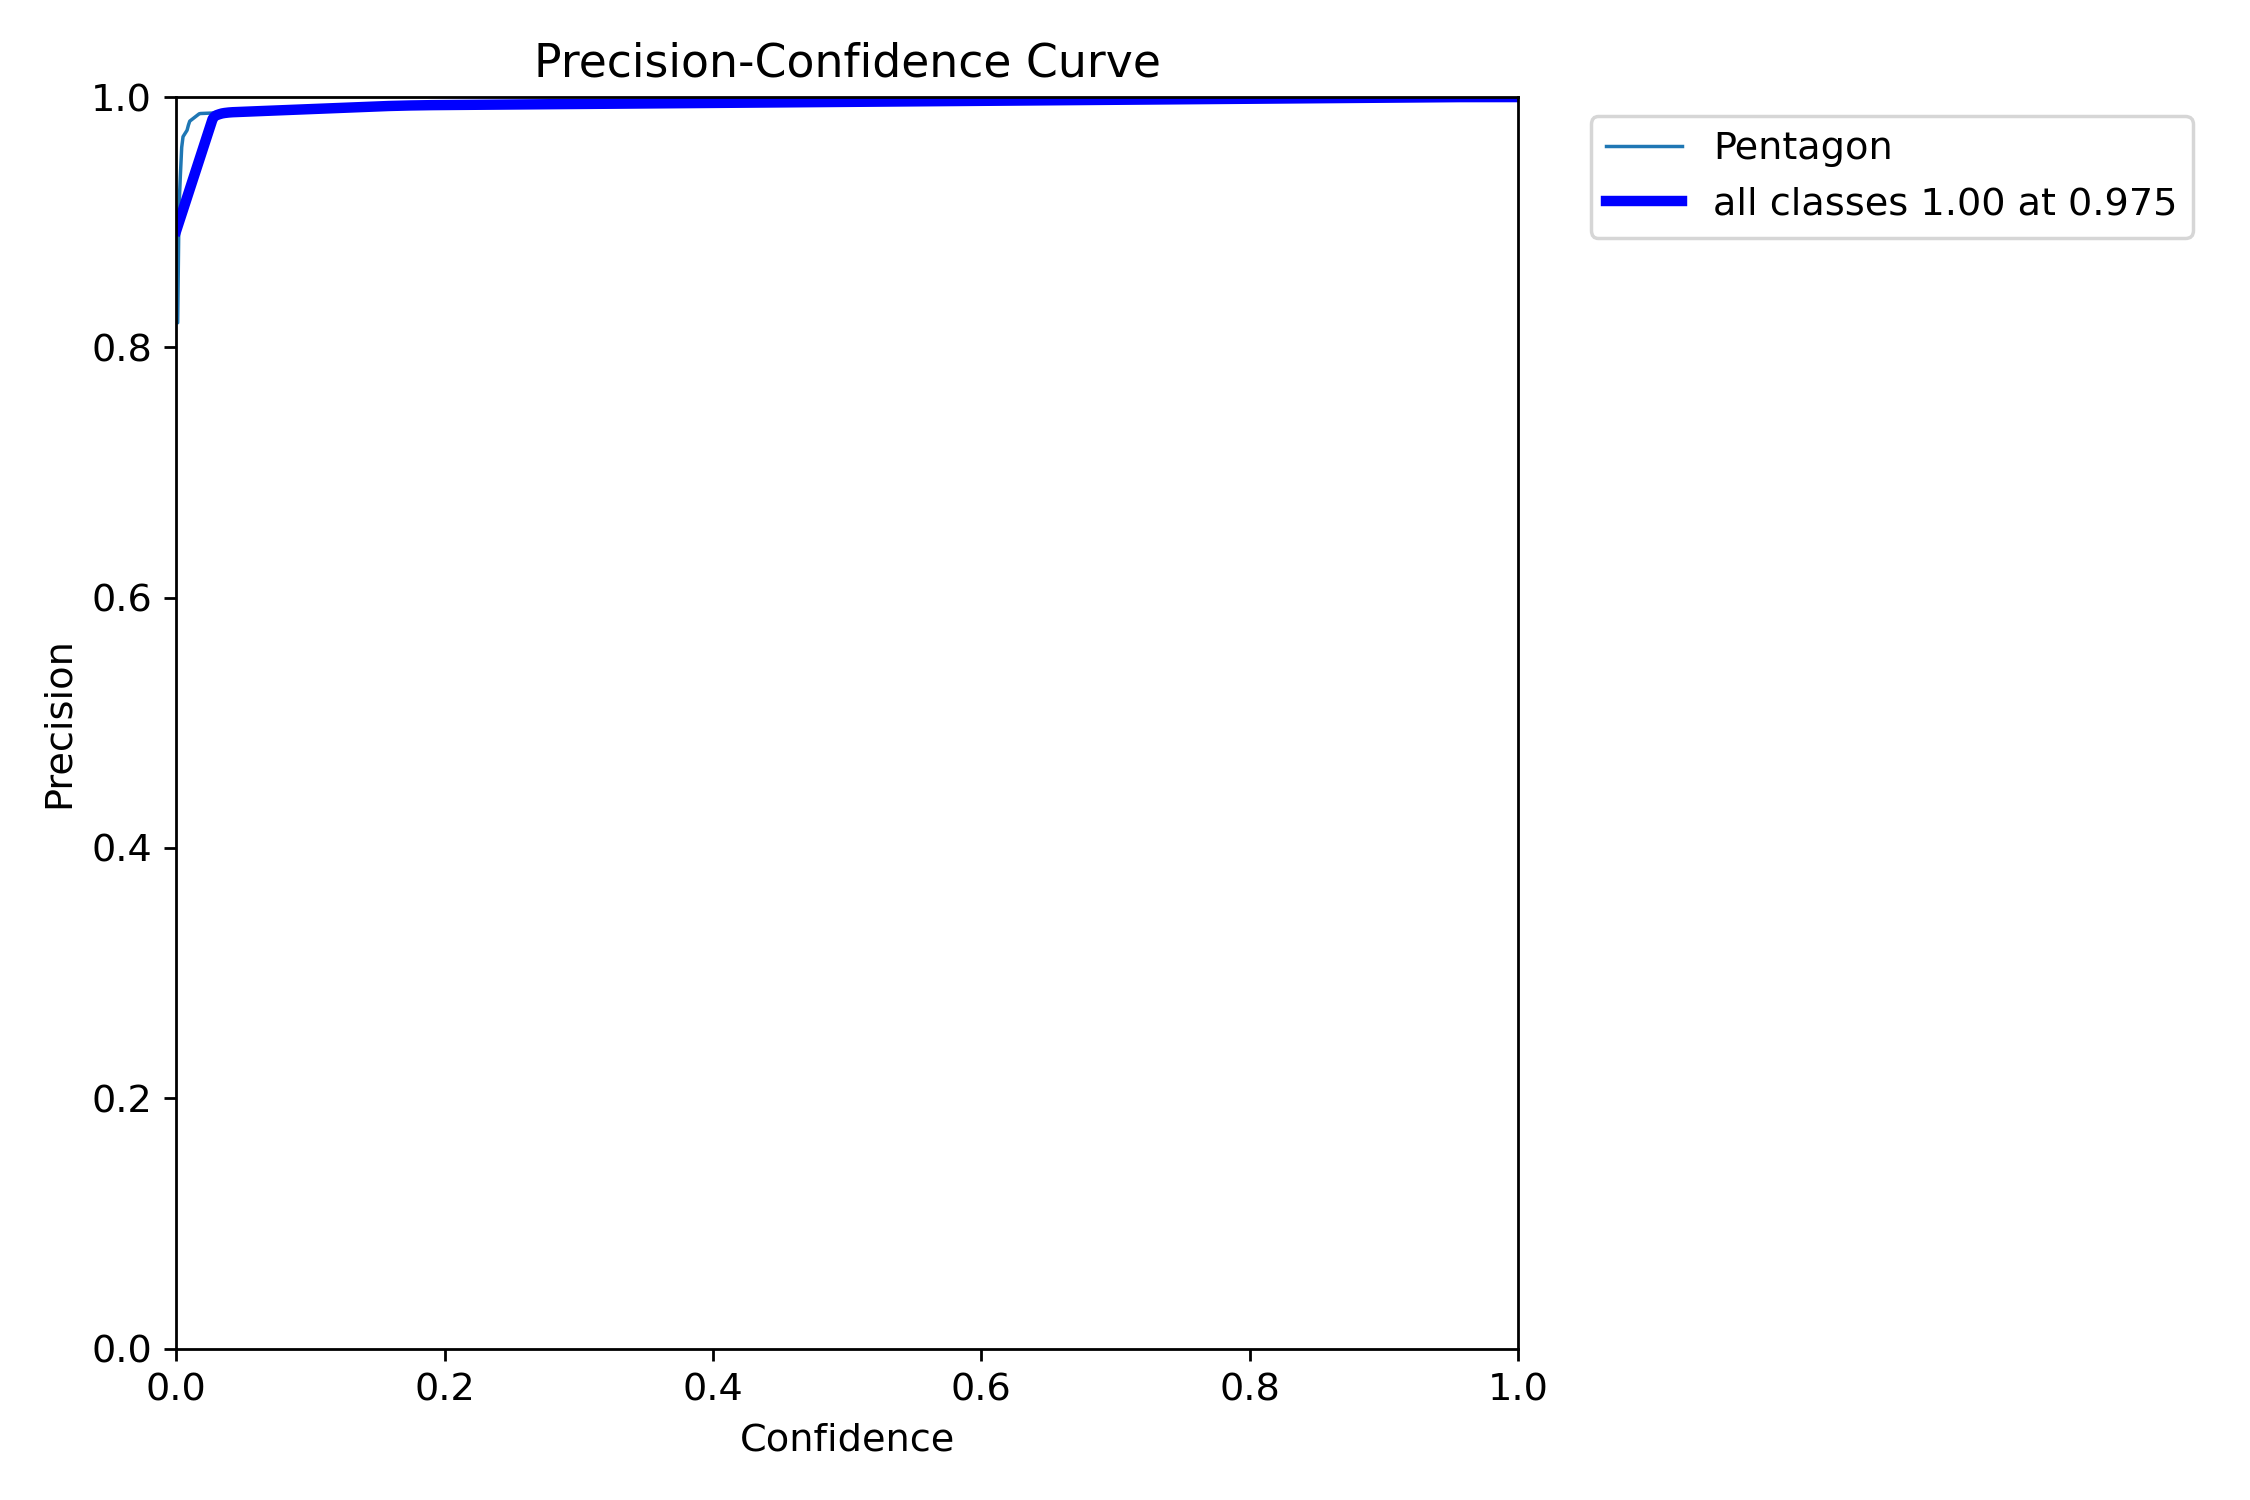

In [3]:
Image("runs/detect/train/P_curve.png", width=600)

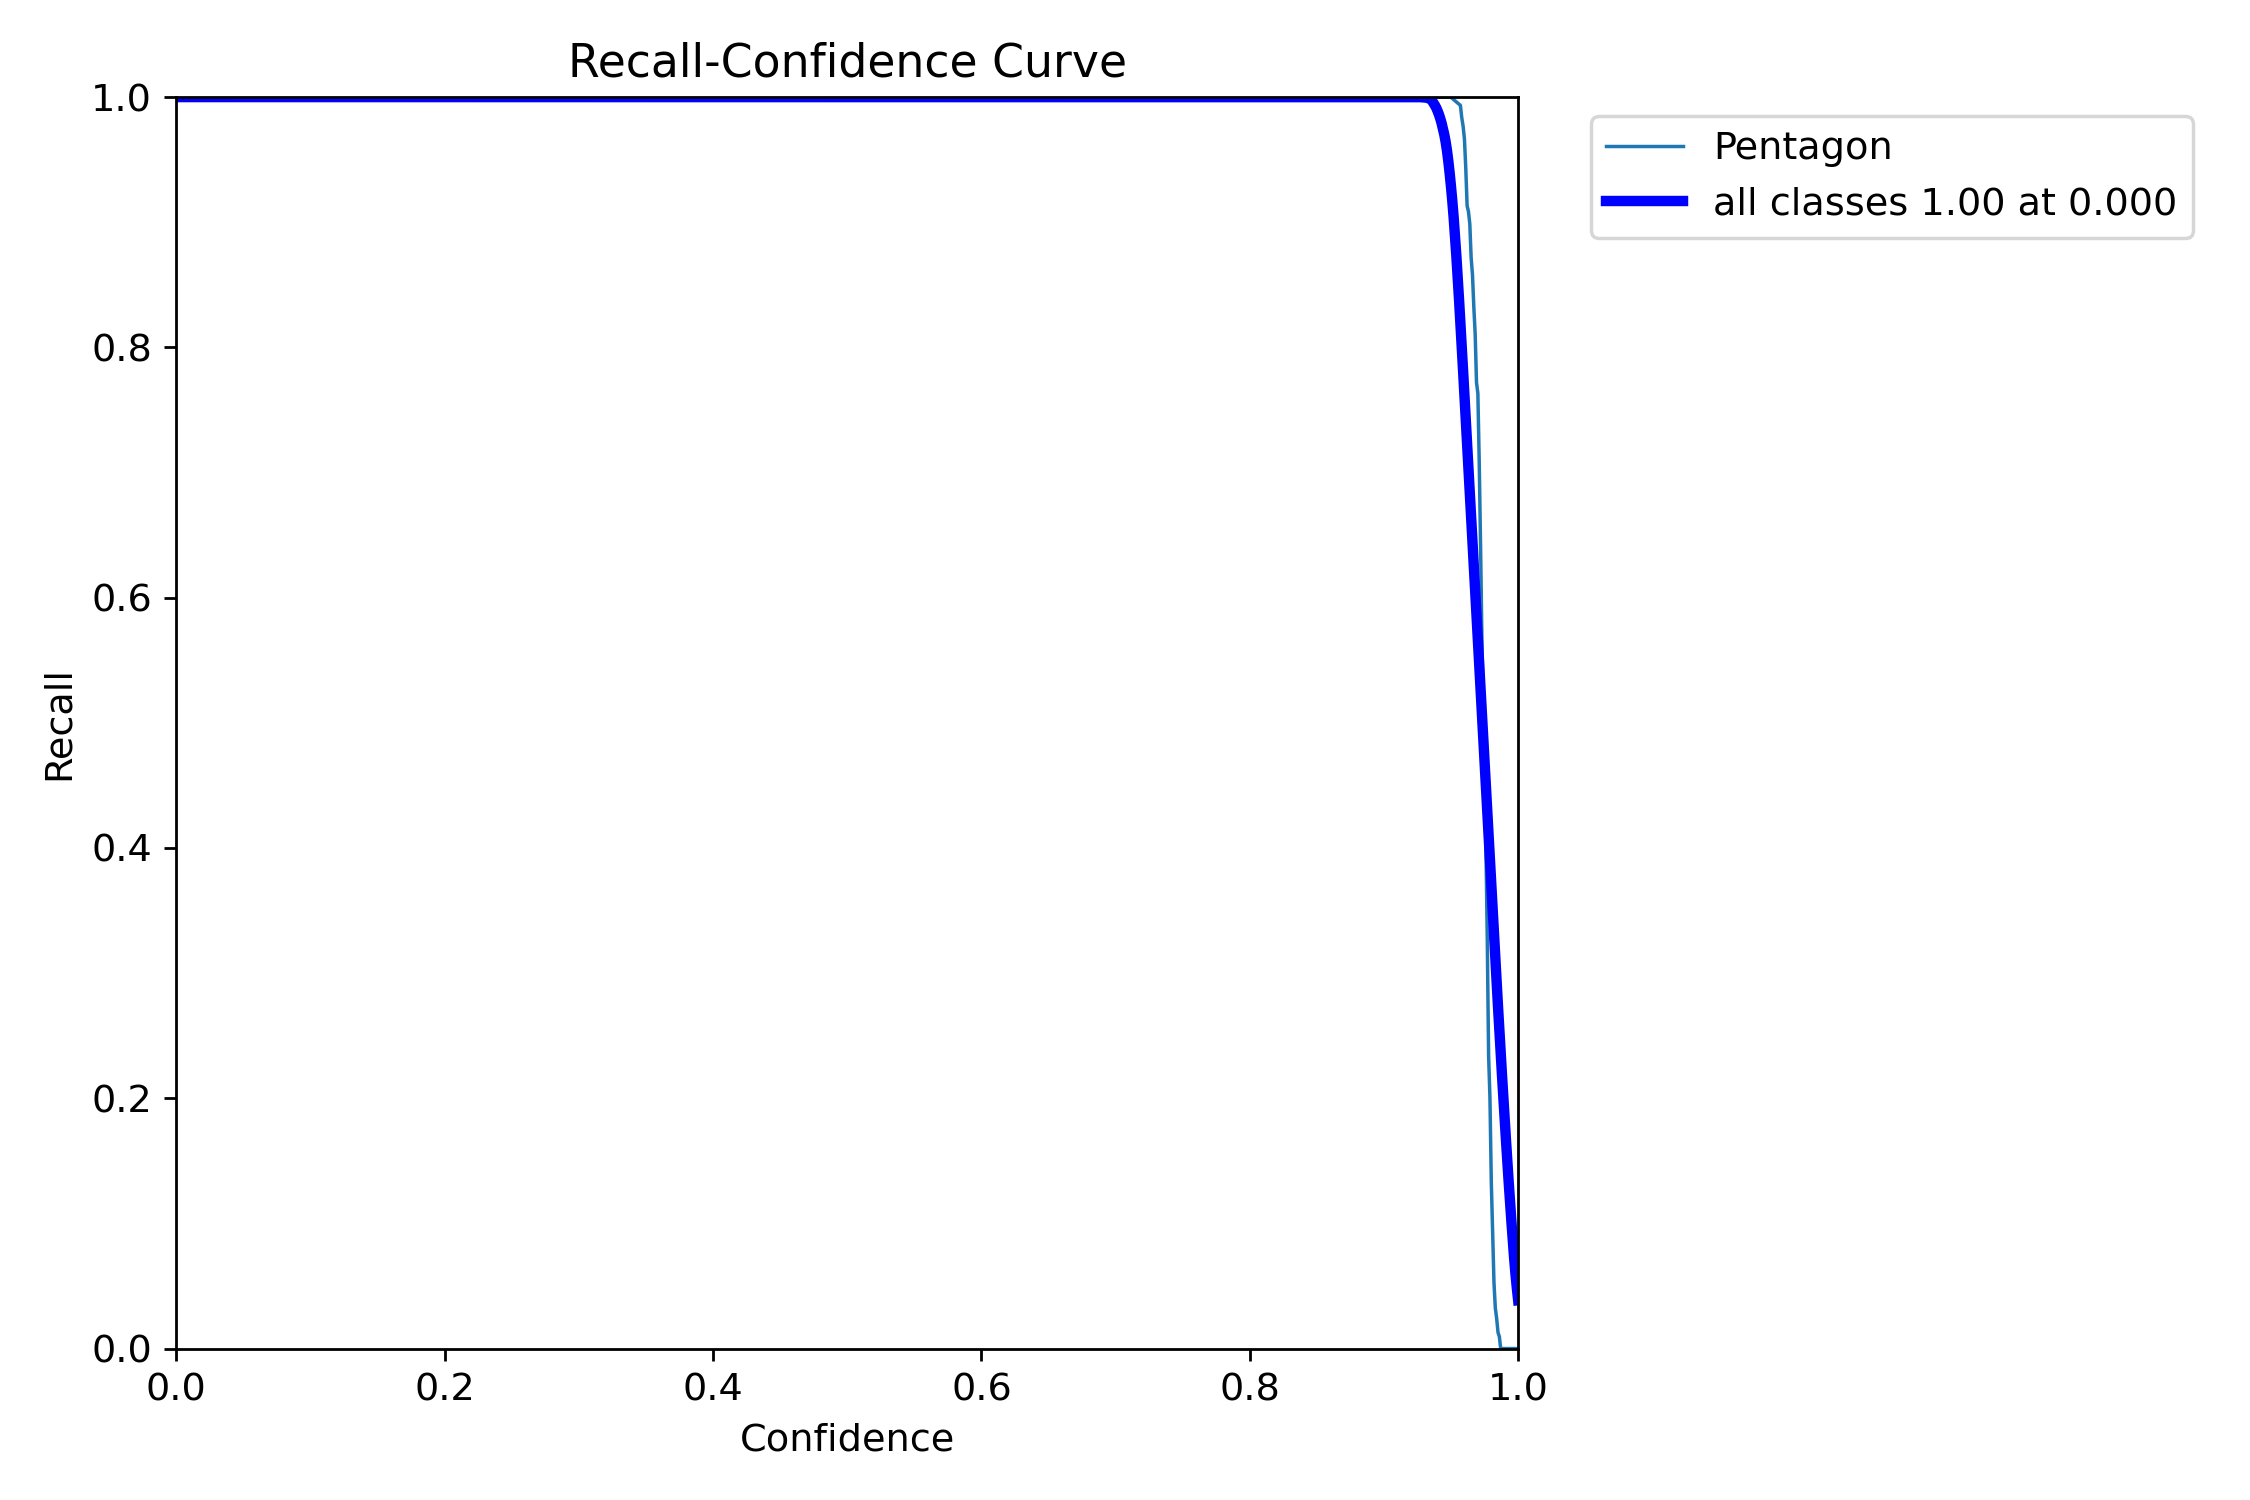

In [4]:
Image("runs/detect/train/R_curve.png", width=600)

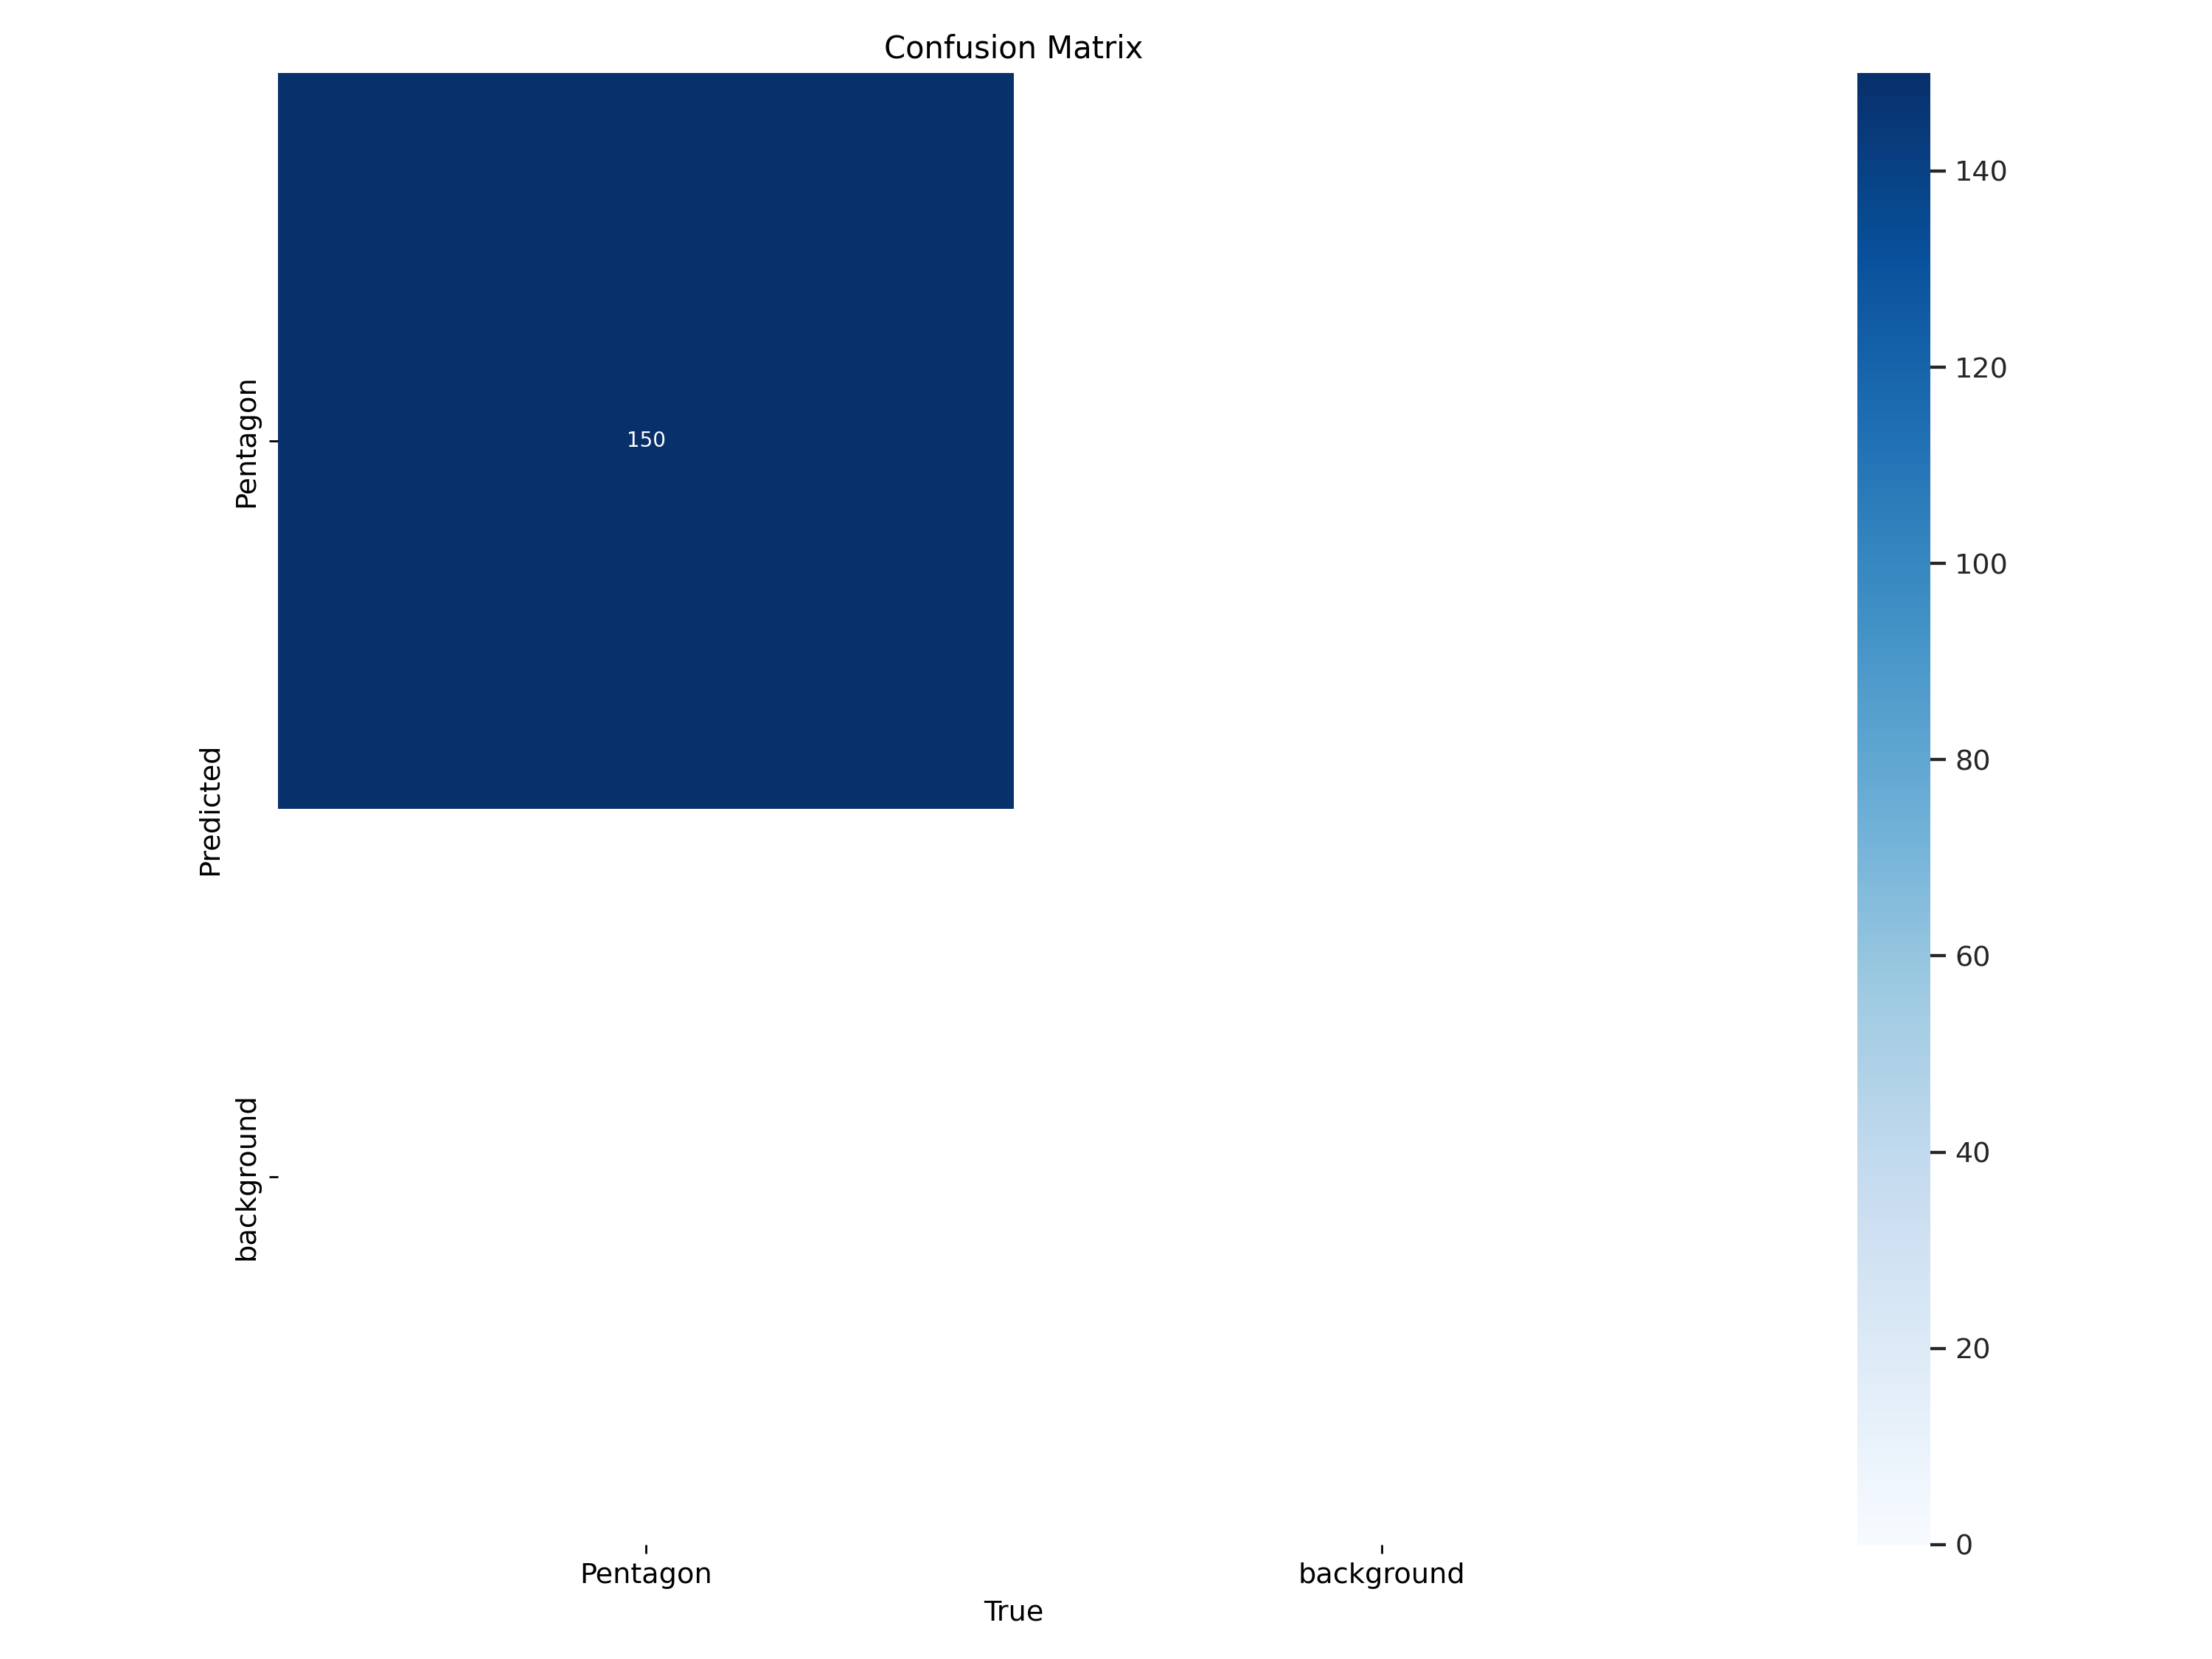

In [5]:
Image("runs/detect/train/confusion_matrix.png", width=600)

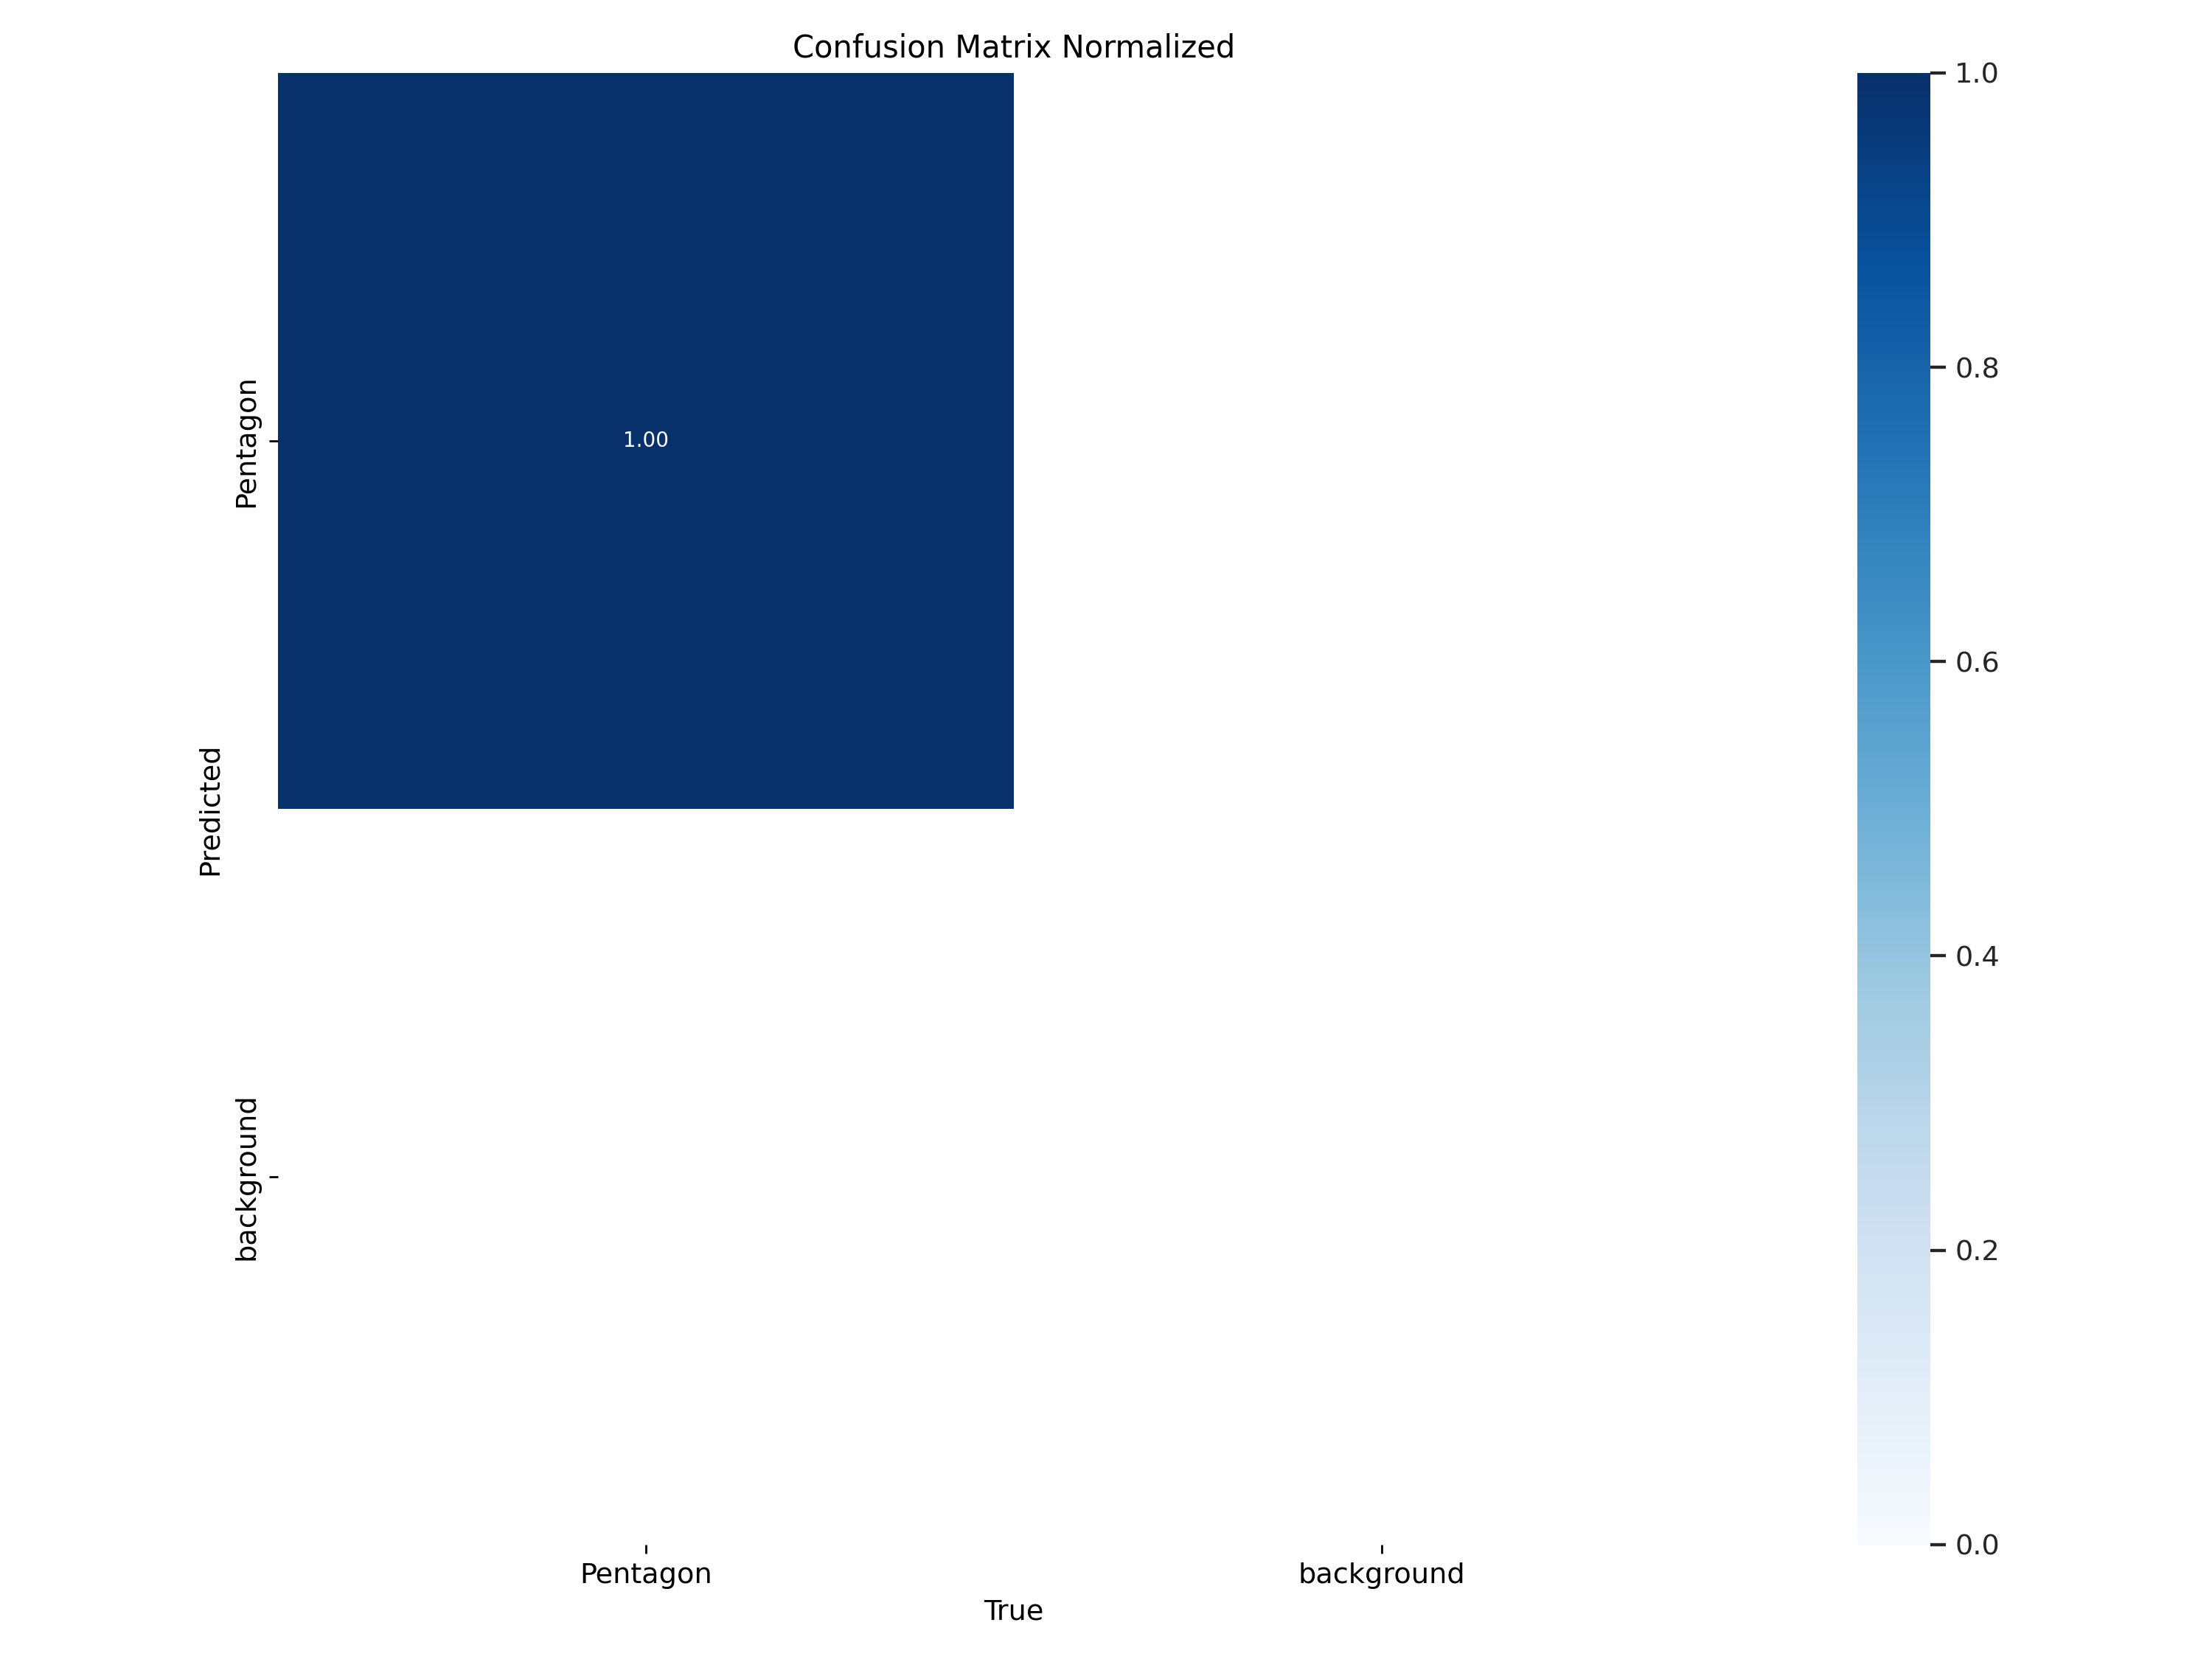

In [6]:
Image("runs/detect/train/confusion_matrix_normalized.png", width=600)

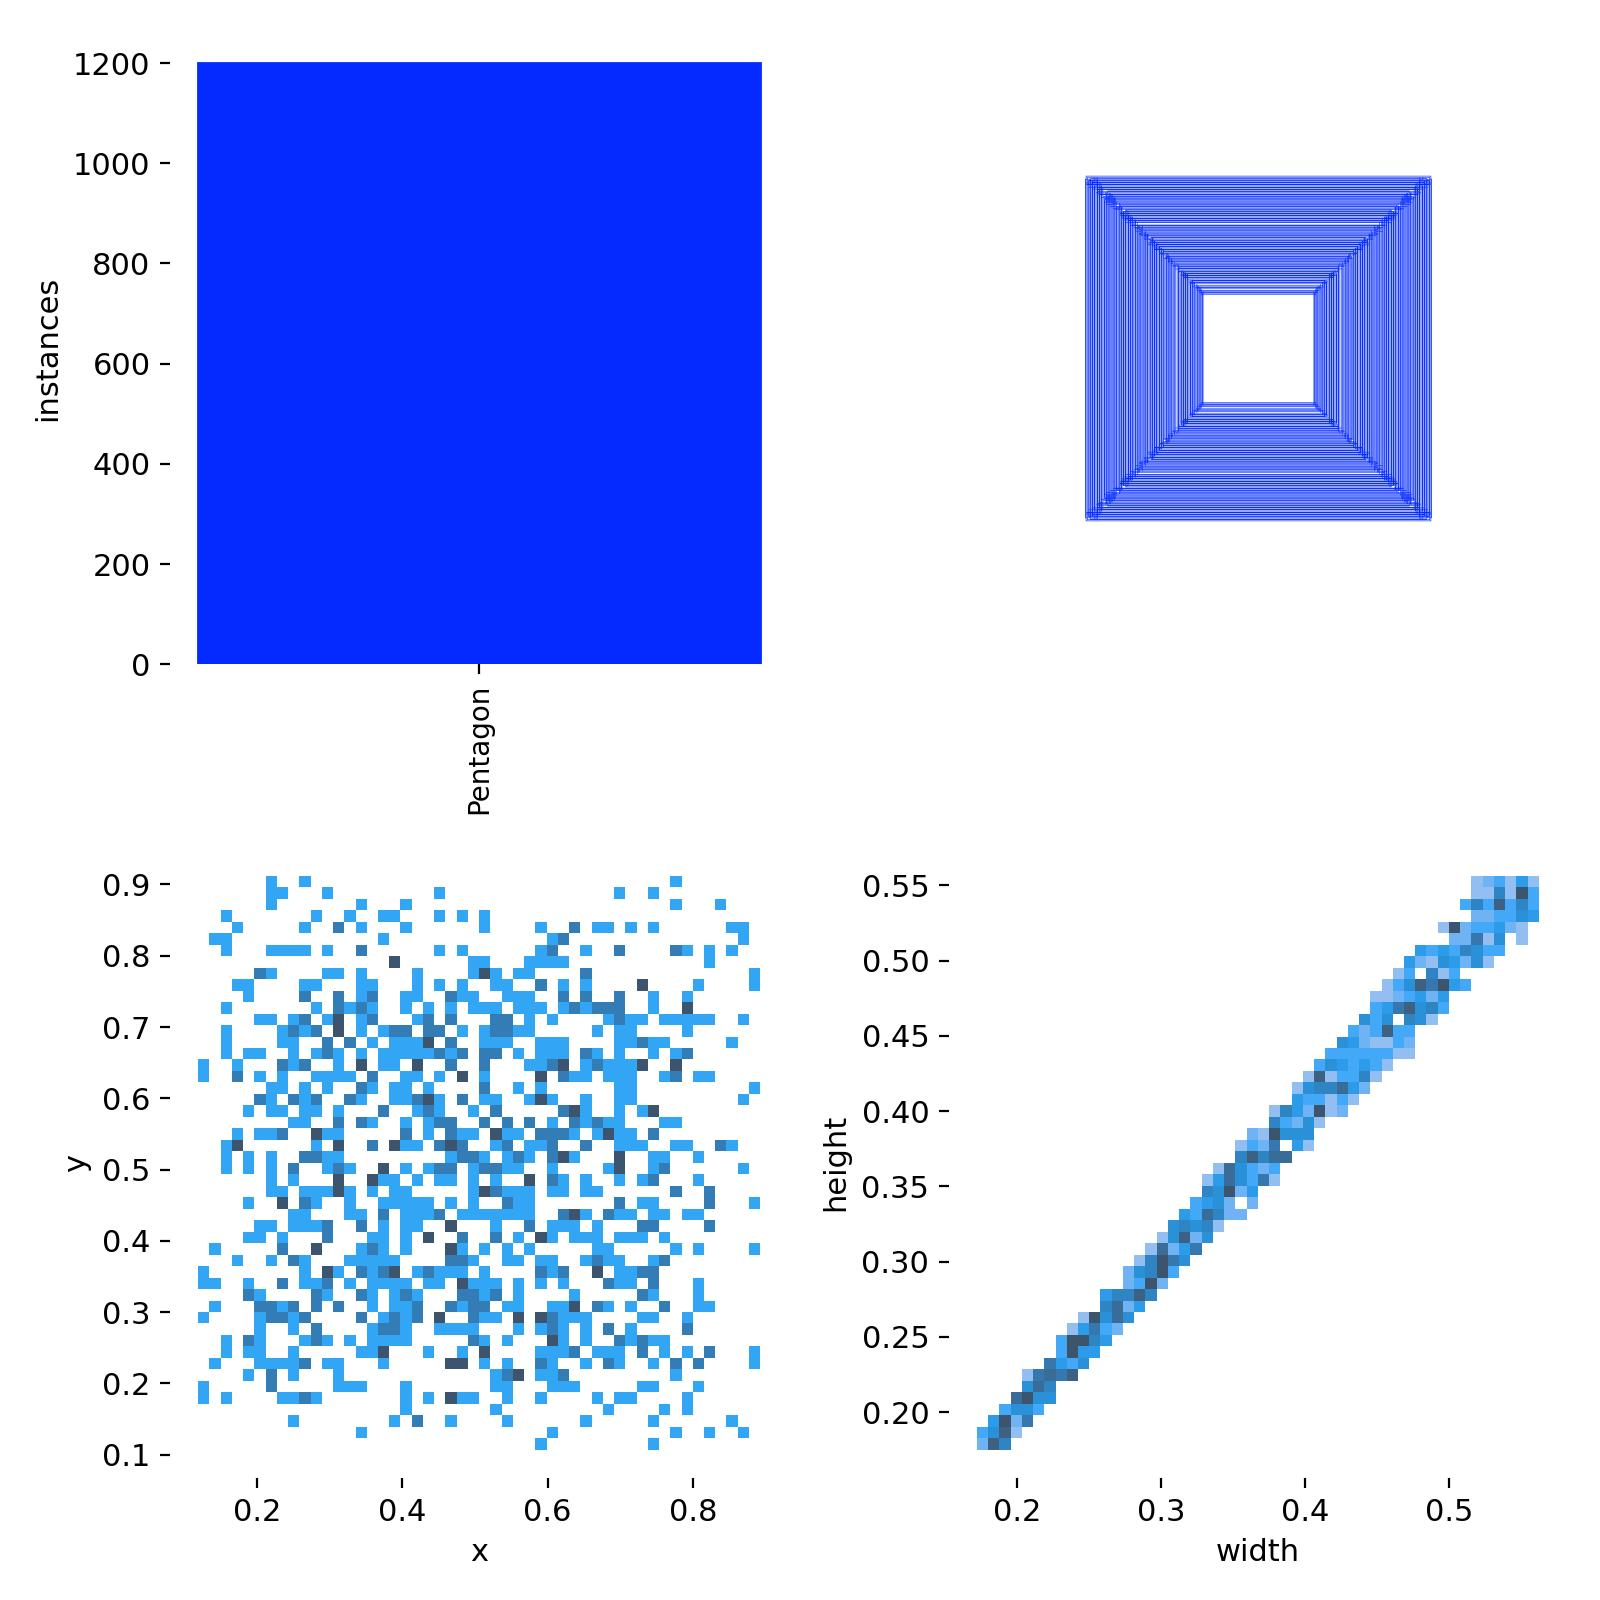

In [7]:
Image("runs/detect/train/labels.jpg", width=600)

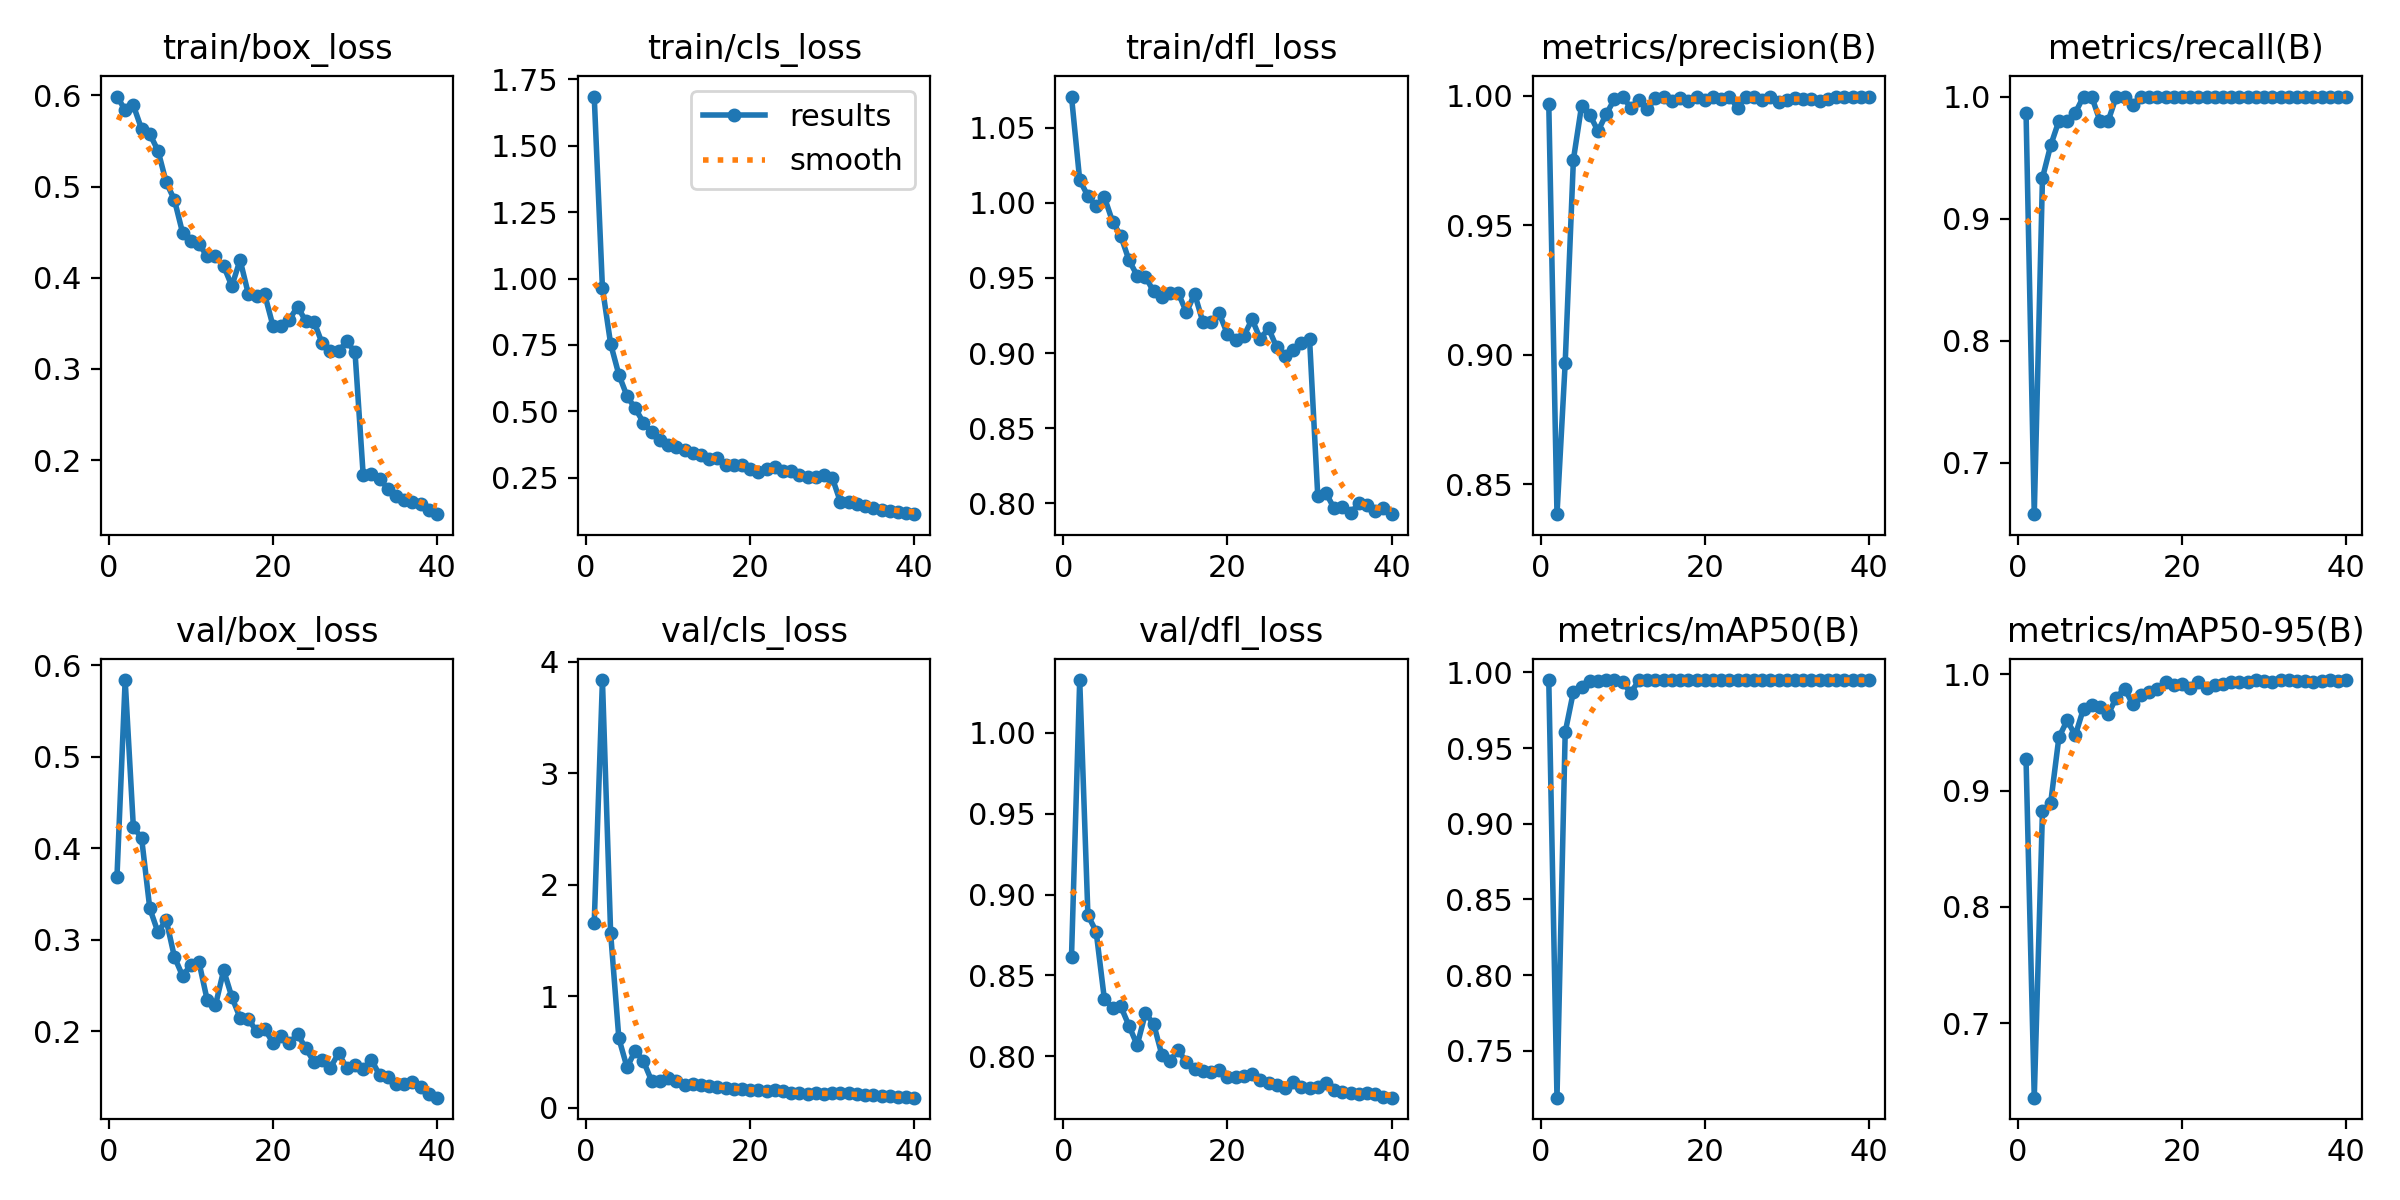

In [8]:
Image("runs/detect/train/results.png", width=600)

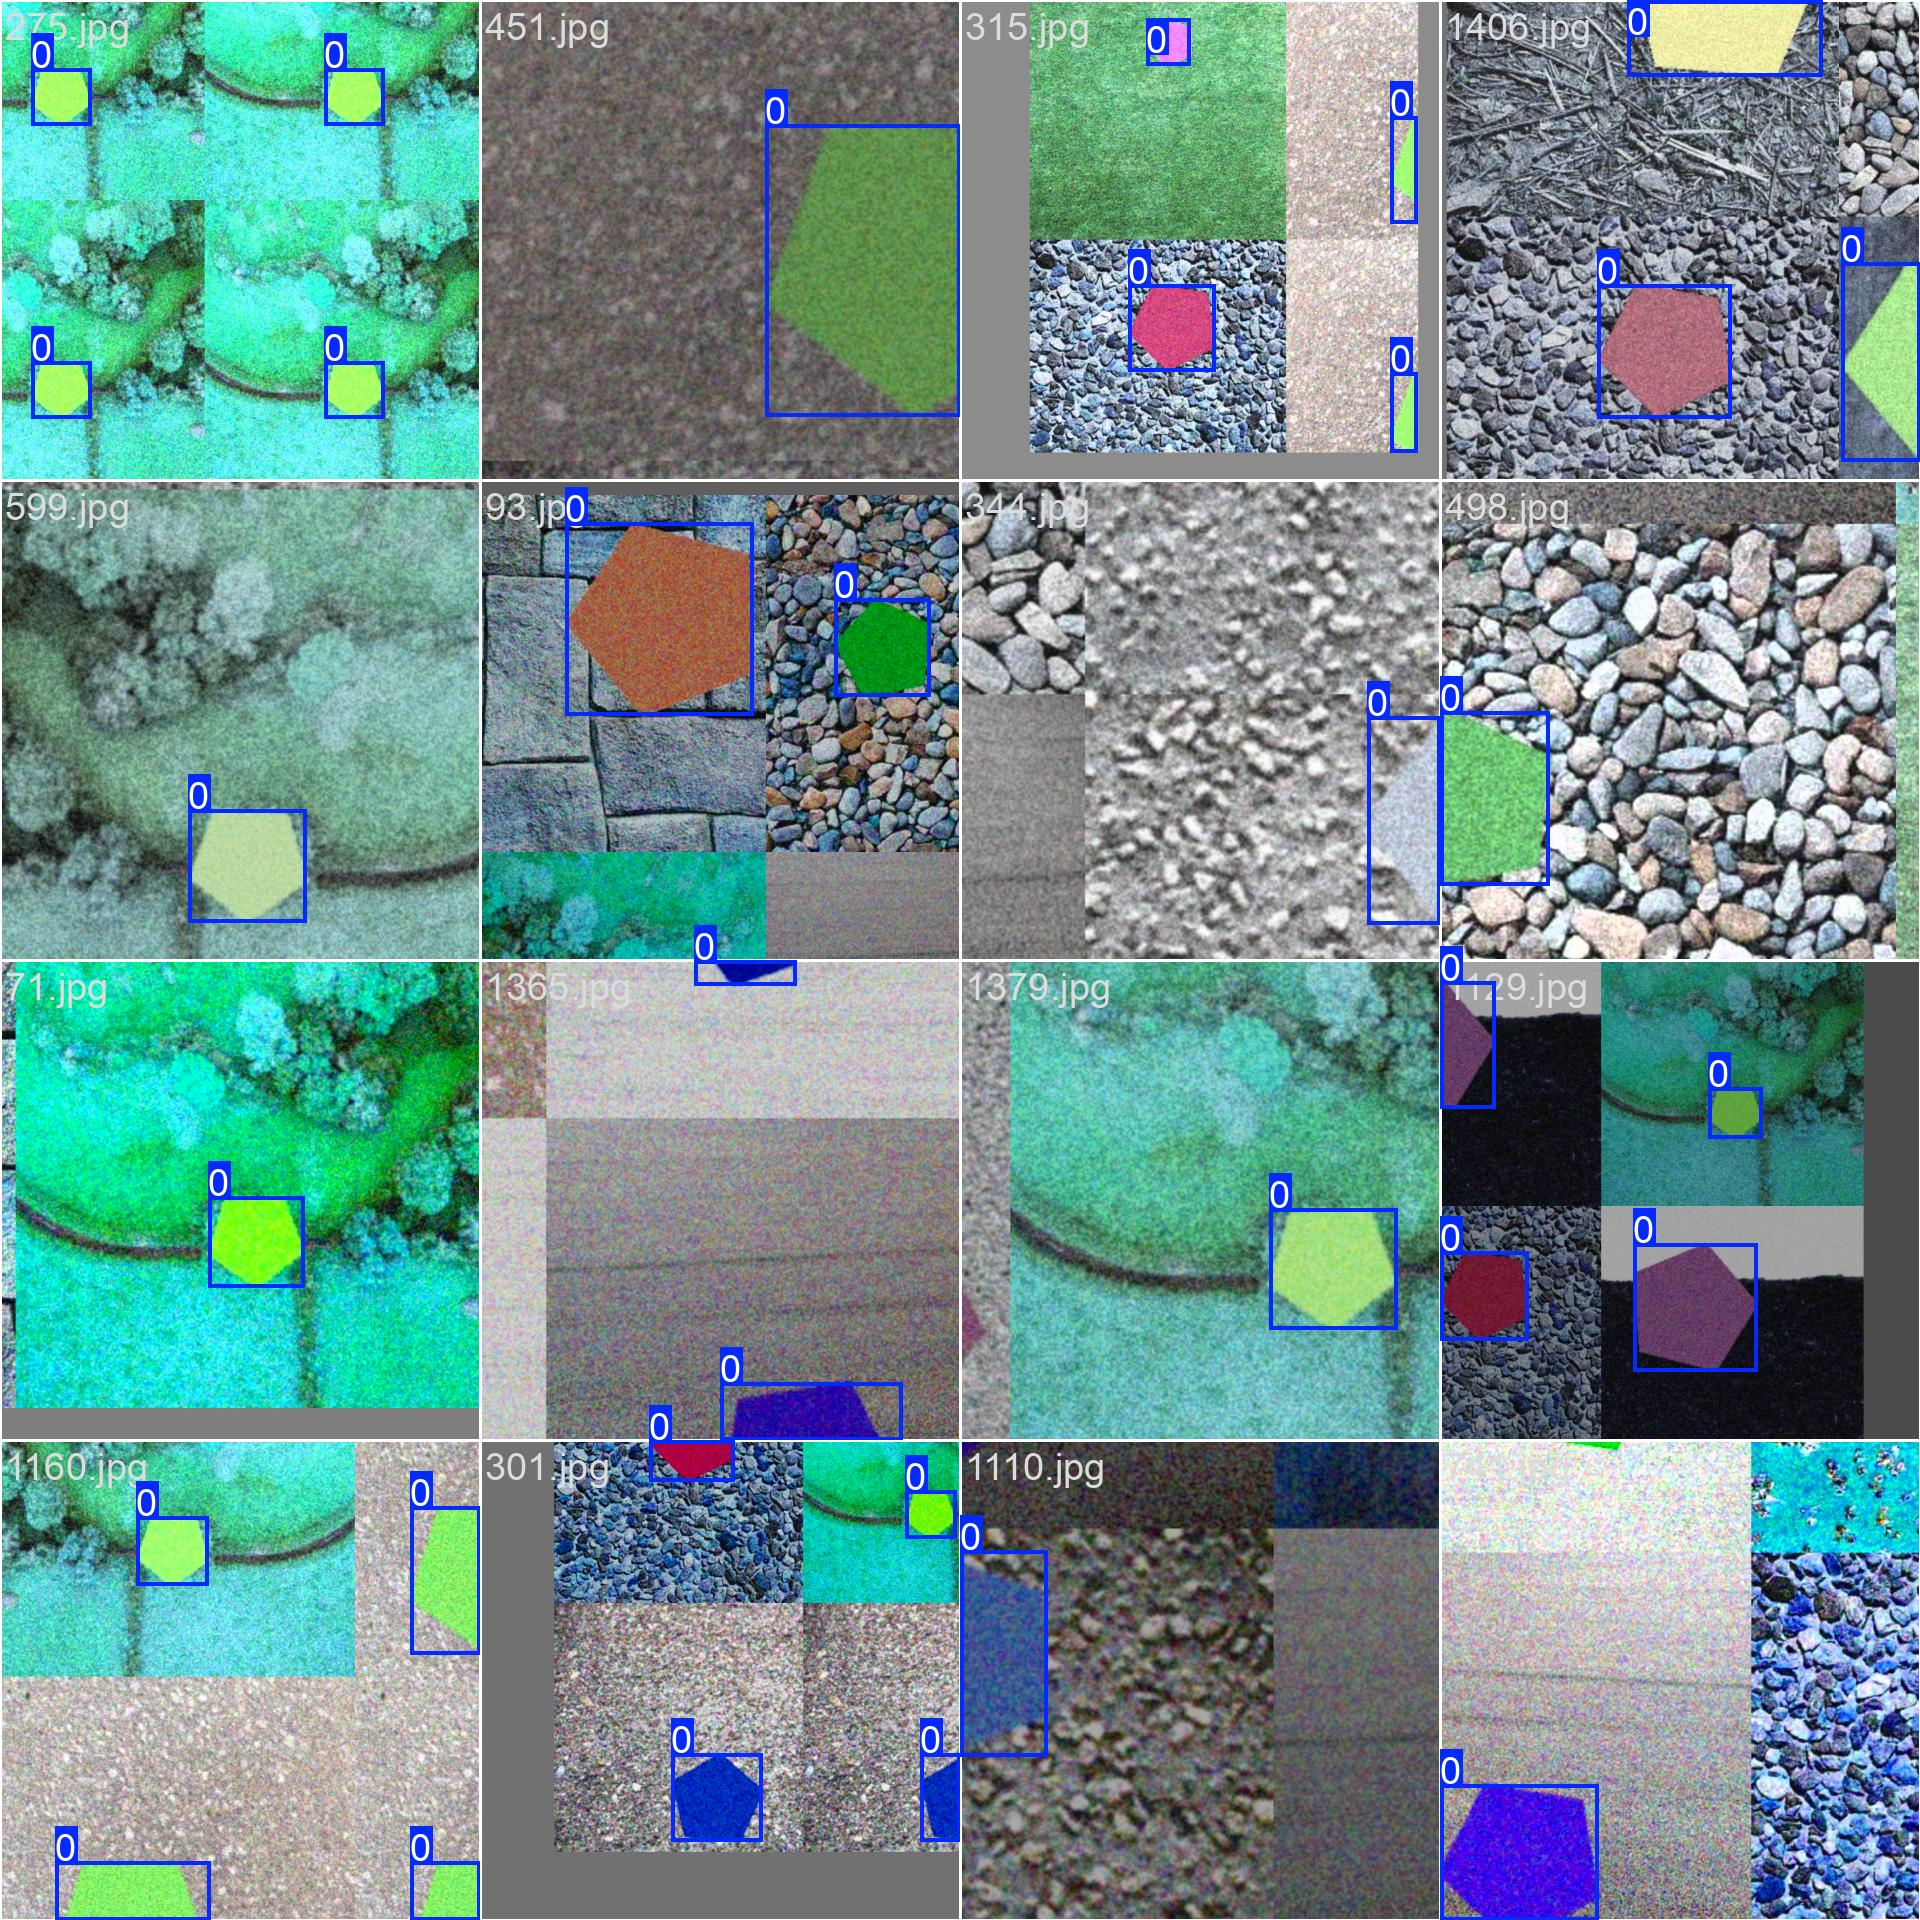

In [9]:
Image("runs/detect/train/train_batch0.jpg", width=600)

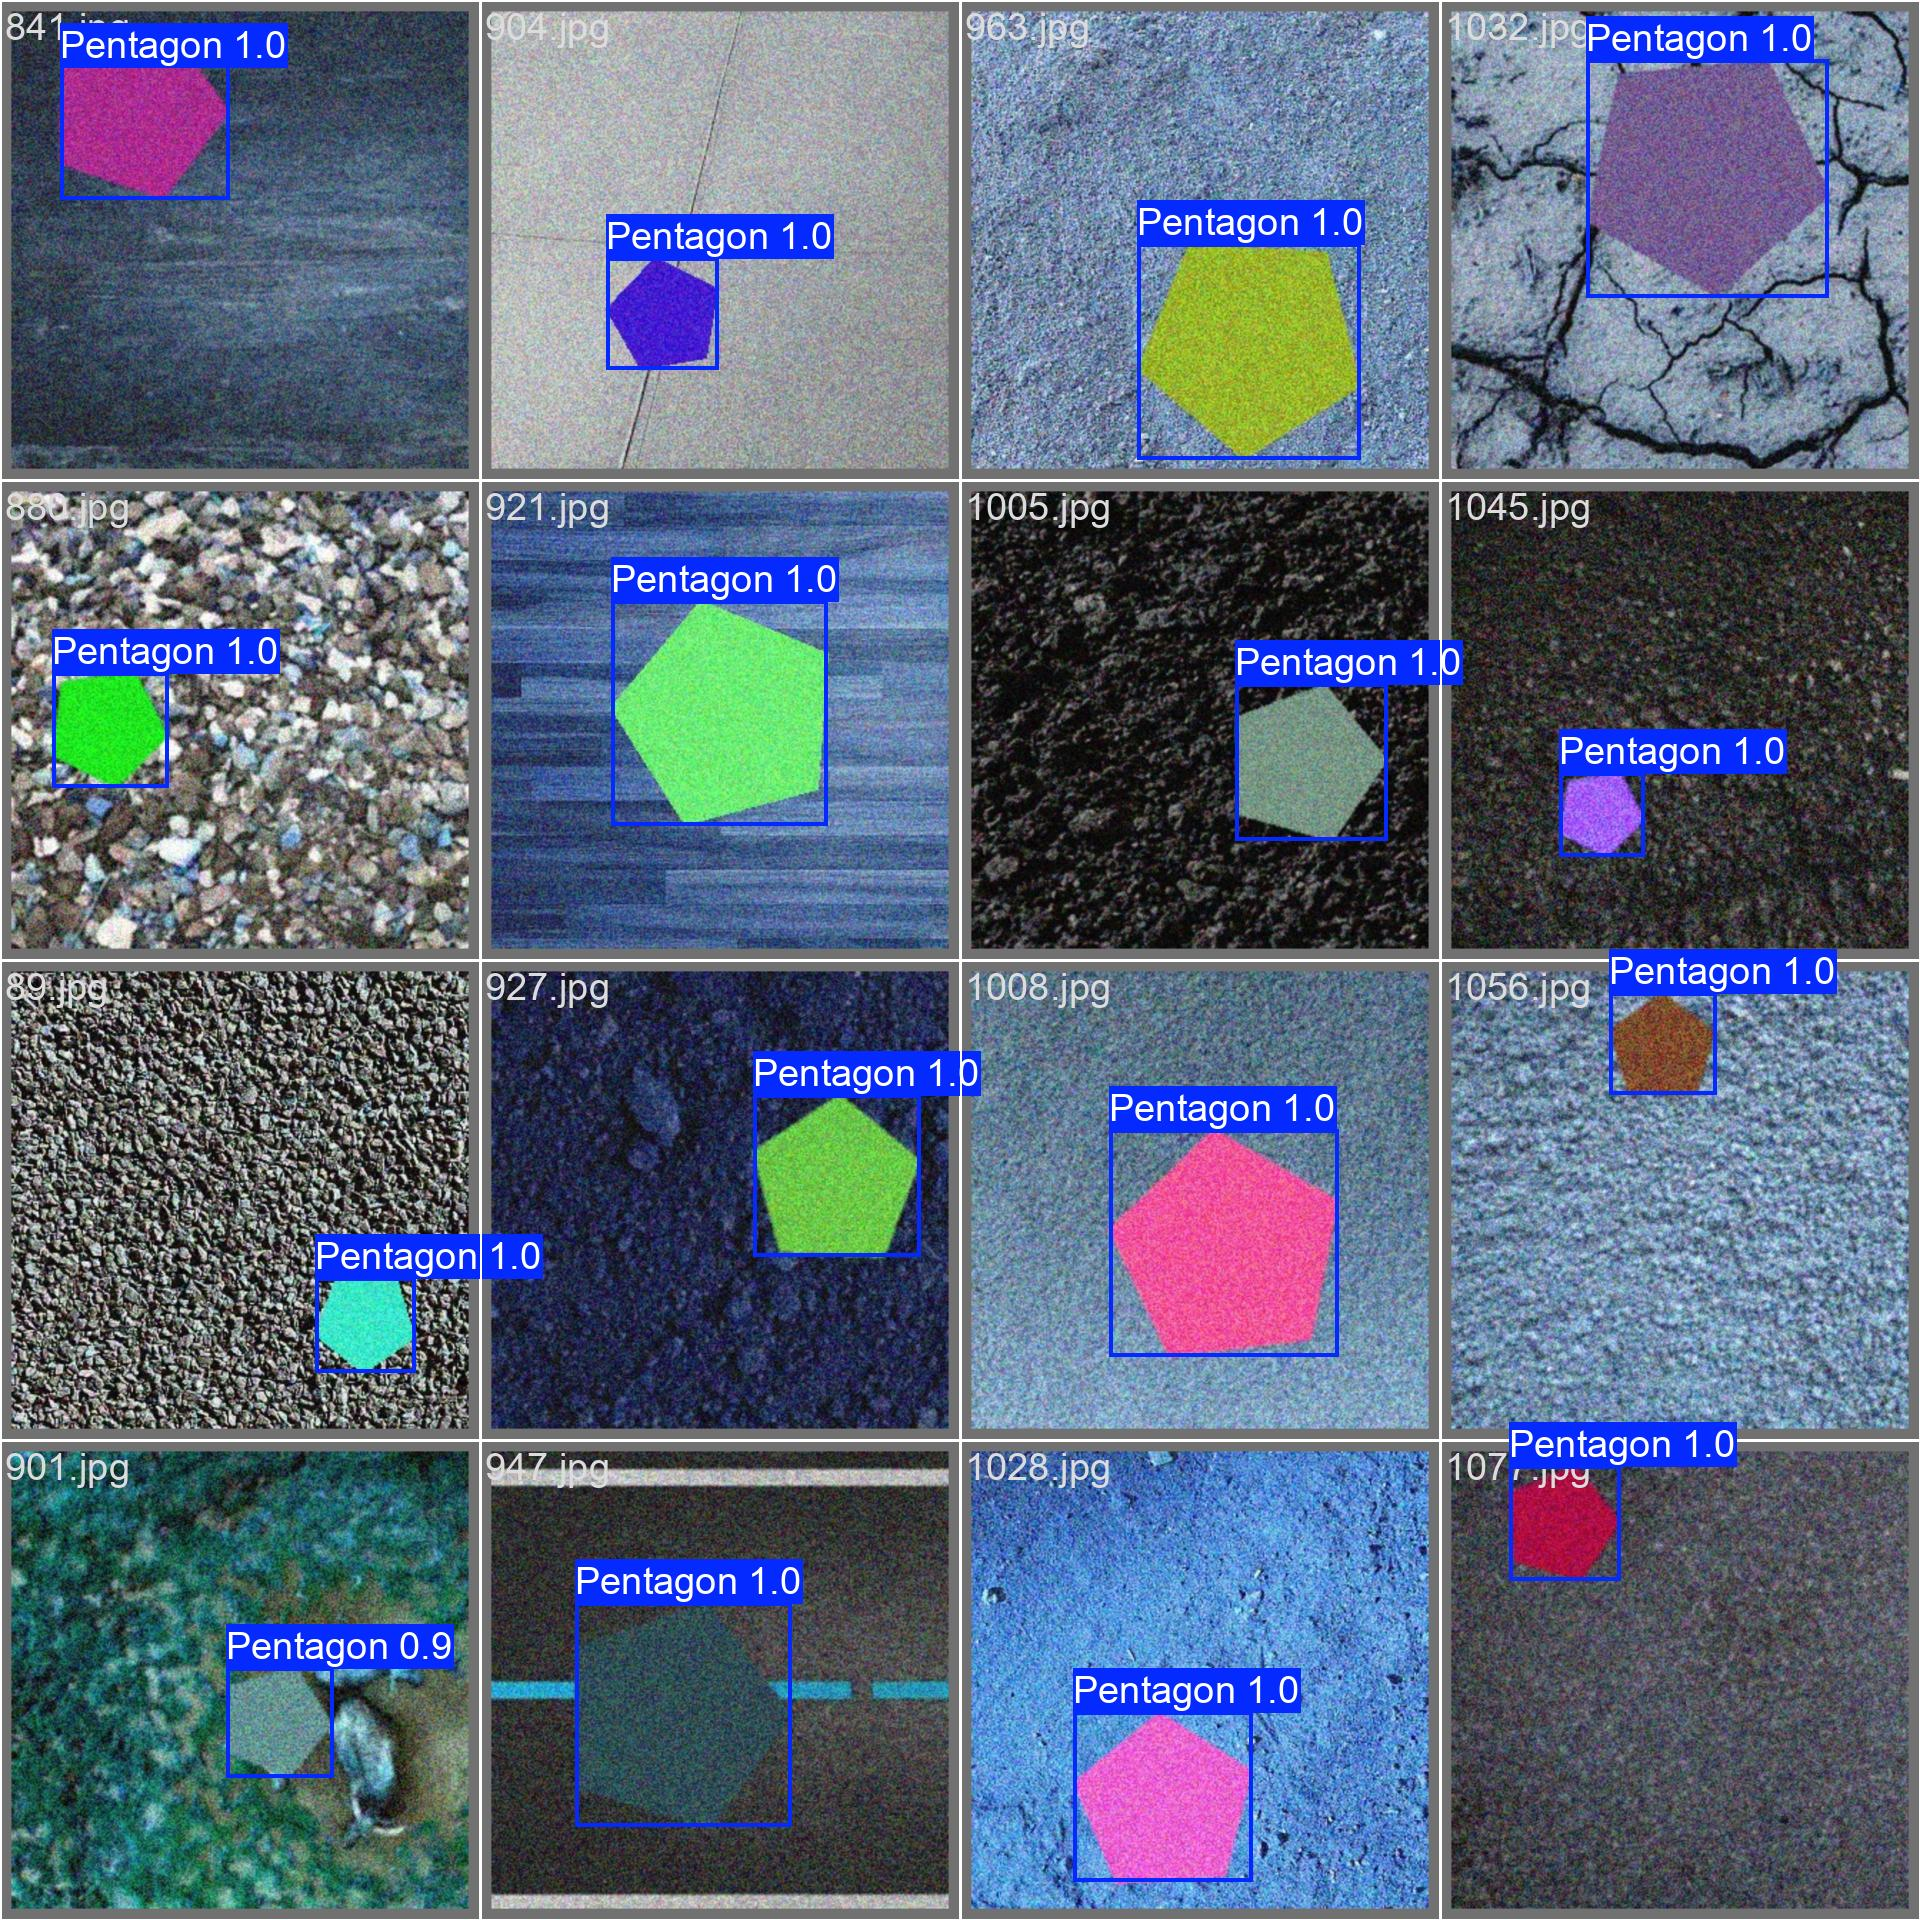

In [10]:
Image("runs/detect/train/val_batch0_pred.jpg", width=600)

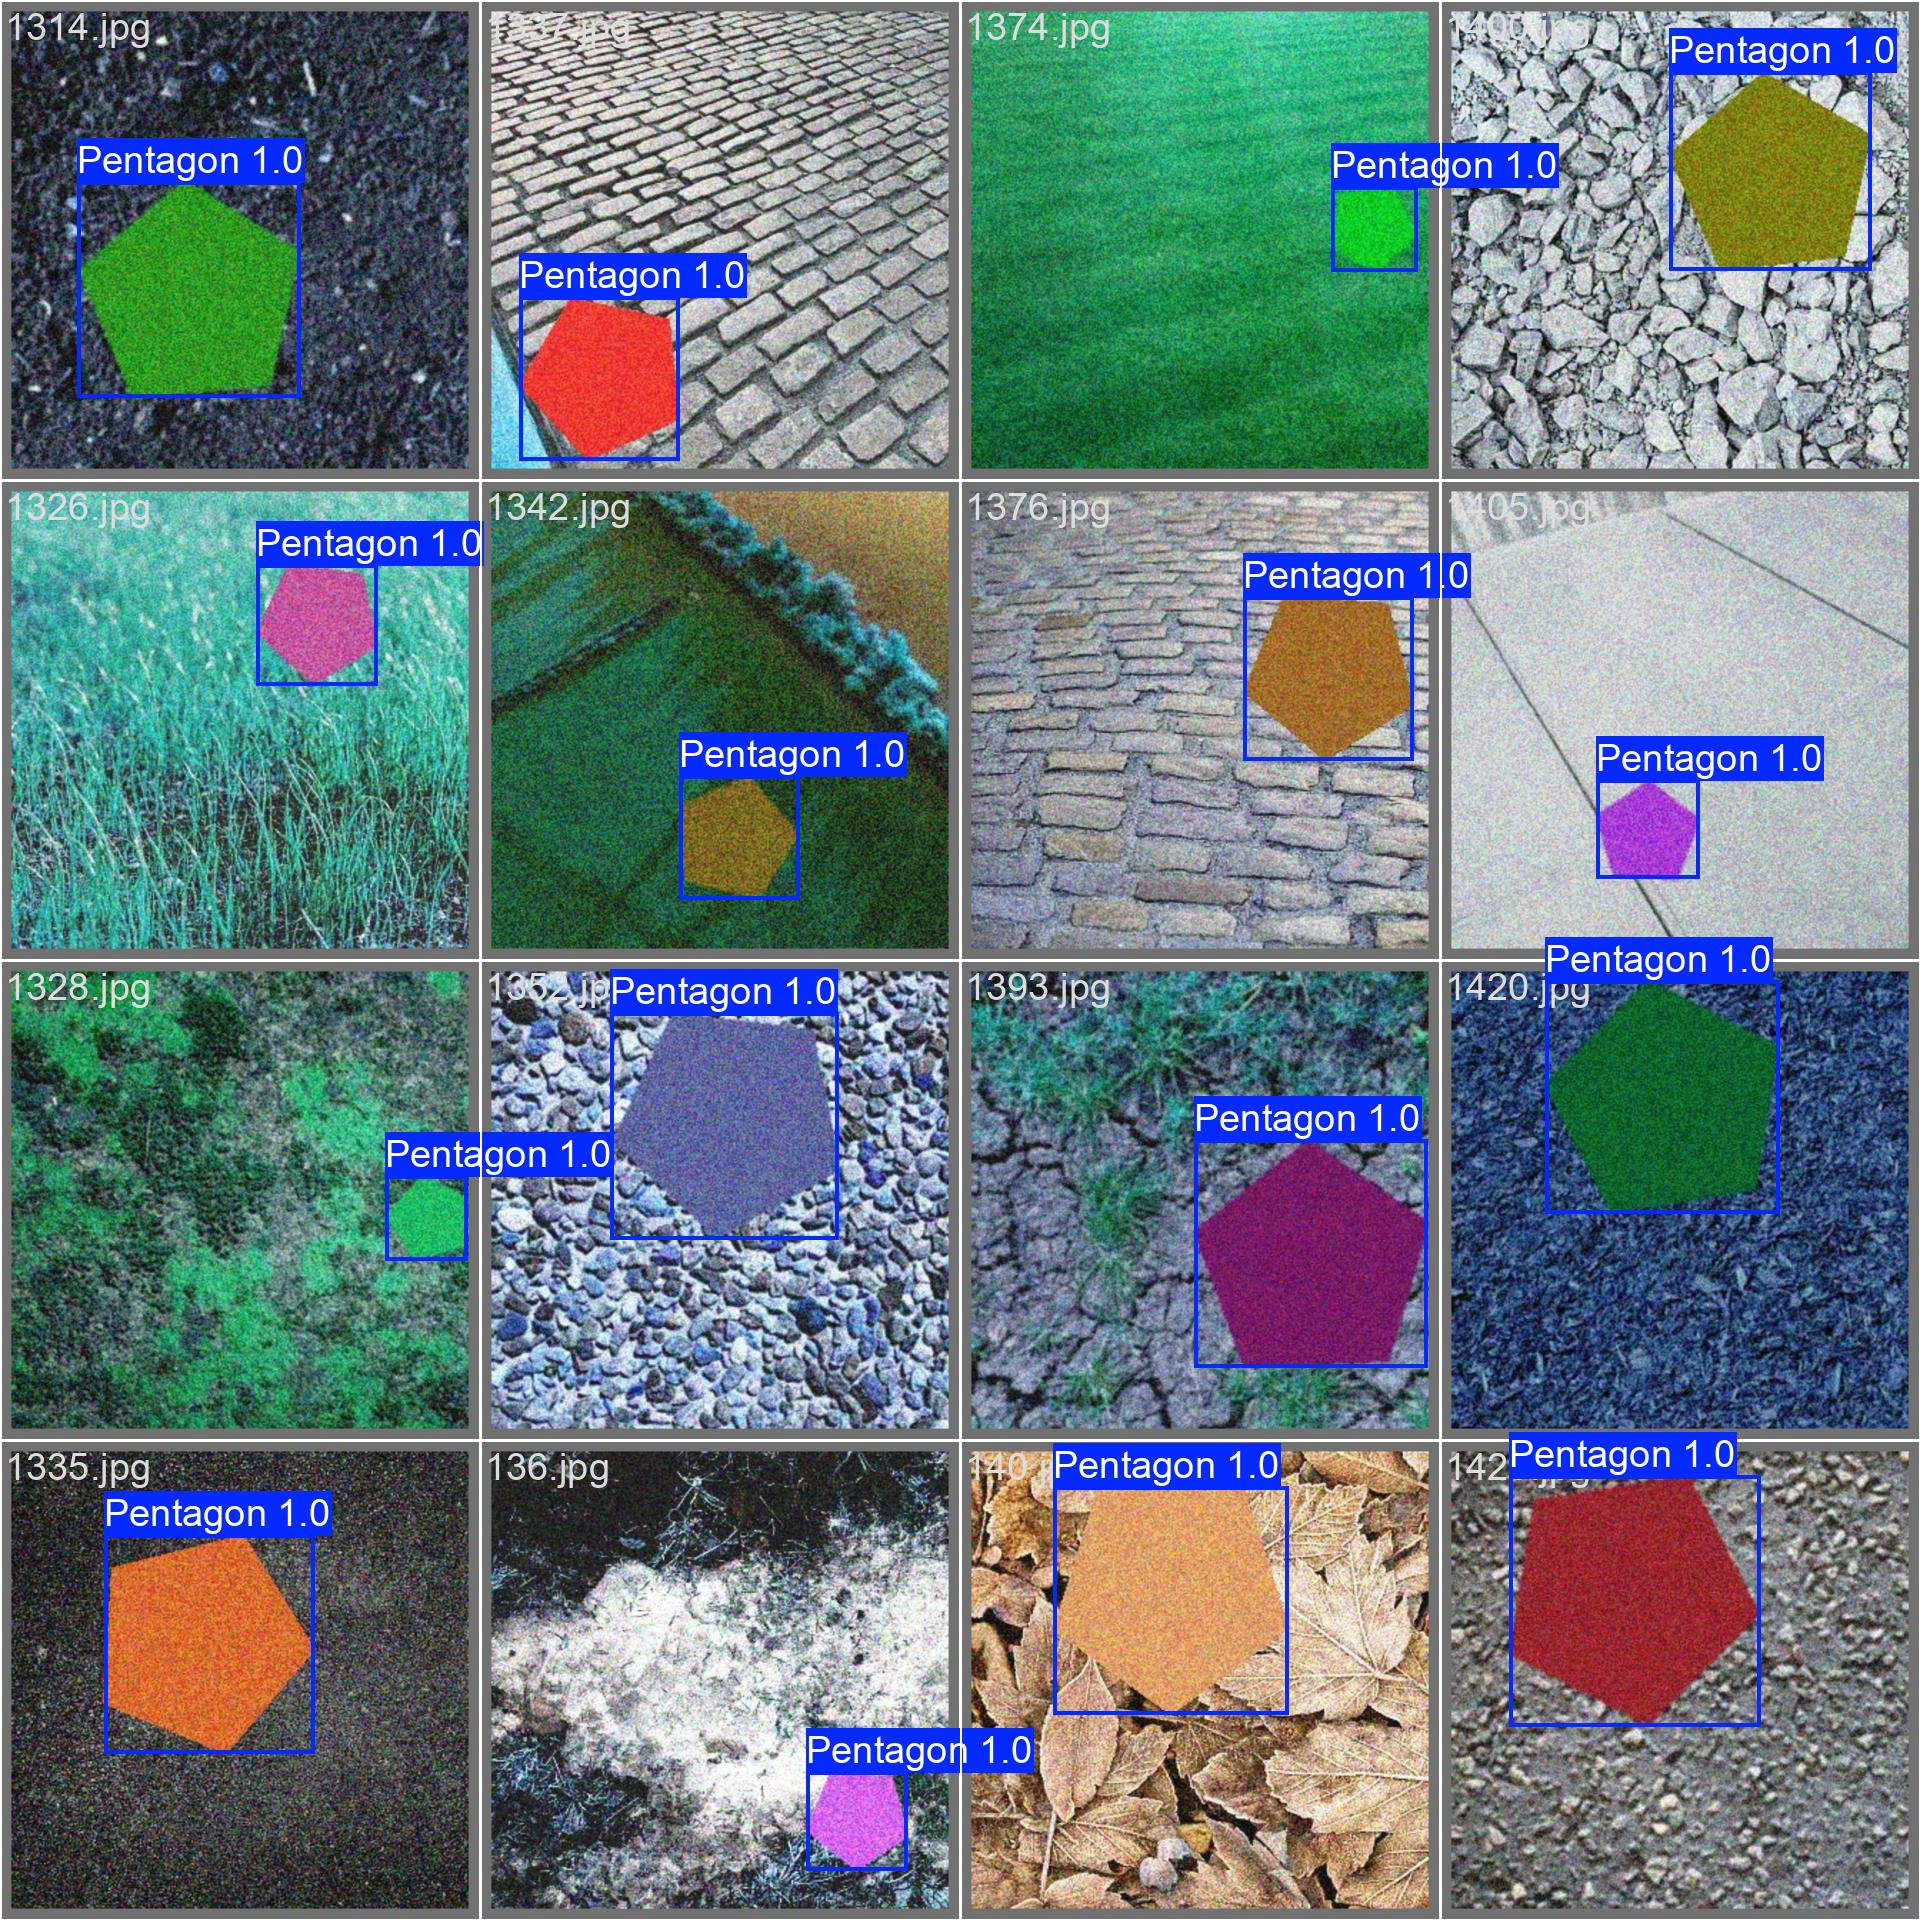

In [11]:
Image("runs/detect/train/val_batch1_pred.jpg", width=600)

**Step # 05  Validate Fine-Tuned Model**

In [14]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Run validation
metrics = model.val(data="dataset/data.yaml")

# Print mAP (mean Average Precision) score
print(metrics)



Ultralytics 8.3.80  Python-3.12.9 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning D:\Github\YoloV11_ShapeDetectionModel\dataset\labels\val.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.29s/it]


                   all        150        150          1          1      0.995      0.995
Speed: 1.7ms preprocess, 77.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to c:\Users\omerk\runs\detect\val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001FD633D1520>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    

**Step # 06 Testing with Images**

In [1]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")
results = model("testing_image2.png", save=True, conf=0.5)


image 1/1 d:\Github\YoloV11_ShapeDetectionModel\testing_image2.png: 640x480 1 Pentagon, 144.9ms
Speed: 5.5ms preprocess, 144.9ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to c:\Users\omerk\runs\detect\predict2


In [2]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=testing_image2.png save=True


Ultralytics 8.3.80 🚀 Python-3.12.9 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 d:\Github\YoloV11_ShapeDetectionModel\testing_image2.png: 640x480 1 Pentagon, 92.2ms
Speed: 3.5ms preprocess, 92.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to c:\Users\omerk\runs\detect\predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [3]:
%matplotlib inline


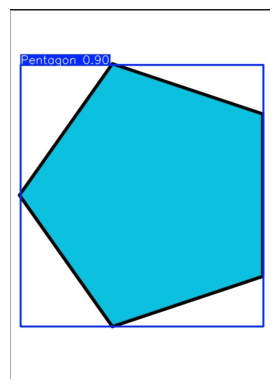

In [5]:
import cv2
import matplotlib.pyplot as plt

# Load the output image
output_image_path = "runs/detect/predict3/testing_image2.jpg"
image = cv2.imread(output_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image
plt.imshow(image)
plt.axis("off")
plt.show()
